In [1]:
import torch 

In [2]:
%config Completer.use_jedi = False

In [3]:
torch.__version__

'1.1.0'

In [4]:
import pandas as pd

In [5]:
import numpy as np

In [6]:
x = np.array([1,2,3,4])

In [7]:
torch.as_tensor(x)

tensor([1, 2, 3, 4], dtype=torch.int32)

In [8]:
z= torch.from_numpy(x)

In [9]:
y = [1,2,4,5]

In [10]:
torch.as_tensor(y).dtype

torch.int64

In [11]:
z.dtype

torch.int32

In [12]:
x, z

(array([1, 2, 3, 4]), tensor([1, 2, 3, 4], dtype=torch.int32))

In [13]:
x[0]=100

In [14]:
z

tensor([100,   2,   3,   4], dtype=torch.int32)

In [15]:
torch.empty(2,2)

tensor([[1.7546e+03, 7.8333e-43],
        [1.7539e+03, 7.8333e-43]])

In [16]:
x = torch.tensor(2.,requires_grad=True)

In [17]:
x

tensor(2., requires_grad=True)

In [18]:
y = 2*x**3 + x**2 + 4*x +3

In [19]:
y

tensor(31., grad_fn=<AddBackward0>)

In [20]:
y.backward()

In [21]:
x.grad

tensor(32.)

In [22]:
# on new data (matrix)

In [23]:
x = torch.tensor([[1.,2.,4.],[1,2,3]],requires_grad=True)

In [24]:
# first layer
y = x**2 + x + 1

In [25]:
y

tensor([[ 3.,  7., 21.],
        [ 3.,  7., 13.]], grad_fn=<AddBackward0>)

In [26]:
# second layer
z = y**2

In [27]:
z

tensor([[  9.,  49., 441.],
        [  9.,  49., 169.]], grad_fn=<PowBackward0>)

In [28]:
# outout layer
out = z.sum()

In [29]:
out

tensor(726., grad_fn=<SumBackward0>)

In [30]:
out.backward()

In [31]:
x.grad

tensor([[ 18.,  70., 378.],
        [ 18.,  70., 182.]])

In [32]:
# now analyse the data at each layer.
# out = sum of all ((x**2 + x + 1)**2)
# derivative of out with respect of x is = 2*(x**2 + x + 1)*(2*x+1)
# now put first value which is 1, answer would be = 2*(1+1+1)*(2+1) = 18
# now put first value which is 2, answer would be = 2*(4+2+1)*(4+1) = 70
# now put first value which is 3, answer would be = 2*(16+4+1)*(8+1) = 182
# now put first value which is 4, answer would be = 2*(16+4+1)*(8+1) = 378


# if mean is there --> then need to take mean , divide the values with total elements in matrix. 

In [33]:
# with mean

x = torch.tensor([[1.,2.,4.],[1,2,3]],requires_grad=True)
# first layer
y = x**2 + x + 1
# second layer
z = y**2
# outout layer
out = z.mean()

out.backward()
x.grad

tensor([[ 3.0000, 11.6667, 63.0000],
        [ 3.0000, 11.6667, 30.3333]])

In [34]:
# with max

x = torch.tensor([[1.,2.,4.],[1,2,3]],requires_grad=True)
# first layer
y = x**2 + x + 1
# second layer
z = y**2
# outout layer
out = z.max()

out.backward()
x.grad

tensor([[  0.,   0., 378.],
        [  0.,   0.,   0.]])

In [35]:
# with sum

x = torch.tensor([[1.,2.,4.],[1,2,3]],requires_grad=True)
# first layer
y = x**2 + x + 1
# second layer
z = y**2
# outout layer
out = z.sum()

out.backward()
x.grad

tensor([[ 18.,  70., 378.],
        [ 18.,  70., 182.]])

## Linear equations solved through pytorch
## step by step

In [266]:
torch.manual_seed(71)
X = torch.linspace(1,50,50)

In [267]:
X = X.reshape(-1,1)

In [268]:
X.dtype

torch.float32

In [269]:
error = torch.randint(-7,8,(50,1), dtype=torch.float)

In [270]:
y = 2*X +1 + error

In [271]:
y.shape

torch.Size([50, 1])

In [272]:
import matplotlib.pyplot as plt

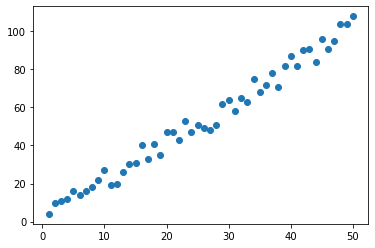

In [273]:
plt.scatter(X.numpy(), y.numpy())

In [274]:
from torch import nn

In [275]:
torch.manual_seed(71)
model = nn.Linear(in_features=1, out_features=1)
print (model.bias)
print (model.weight)

Parameter containing:
tensor([-0.3306], requires_grad=True)
Parameter containing:
tensor([[0.0145]], requires_grad=True)


<div class="alert alert-info">
   <strong>Explanation:: <br><br></strong> 
    First initializing a model which has its own weight and bias already( without training) depending on the input features and output features given at calling the Model class. 
    <br><br>
    For exmample, model with 2 input and 1 output is initialized.
    <br>      
    <strong>model = Model(2,1)</strong>
    <br><br>
    Now will check the model by providing a 'x' random value and analyse the y value with forward function.    
    <br><br>
    model.forward(x)
    
 
</div>

In [276]:
class Model(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()
        self.linear = nn.Linear(in_features, out_features)
        
    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred

In [277]:
# initial phase . this decides how many input features and out features in model
torch.manual_seed(71)

model = Model(2,1)

In [278]:
model.linear.bias

Parameter containing:
tensor([0.6639], requires_grad=True)

In [279]:
model.linear.weight

Parameter containing:
tensor([[ 0.0103, -0.2338]], requires_grad=True)

In [280]:
# when model is heavy and more weights and bias

for name, param in model.named_parameters():
    print(name, '\t\n' , param,'\t\n')

linear.weight 	
 Parameter containing:
tensor([[ 0.0103, -0.2338]], requires_grad=True) 	

linear.bias 	
 Parameter containing:
tensor([0.6639], requires_grad=True) 	



<div class="alert alert-info">
    weight and bias from modal, equation comes out to be as: <br><br>
    y = 0.0103*x1 +(-0.2338)*x2 + 0.6639
     <br><br>
    now x is provided in model as [1,2]
    <br>
    then y would be, 
    <br>
    y = 0.0103*1 +(-0.2338)*2 + 0.6639
    <br>
    y = 0.0103 - 0.4676 + 0.6639 = 0.2066
</div>

## passing the tensor to model

In [281]:
x = torch.tensor([1.0,2.0])
print( model.forward(x))

tensor([0.2066], grad_fn=<AddBackward0>)


## lets replicate whole model for 1,1 for simplicity

In [312]:
torch.manual_seed(71)

model = Model(1,1)

for name, param in model.named_parameters():
    print(name, '\t\n' , param,'\t\n')

linear.weight 	
 Parameter containing:
tensor([[0.0145]], requires_grad=True) 	

linear.bias 	
 Parameter containing:
tensor([-0.3306], requires_grad=True) 	



In [313]:
torch.manual_seed(19)
x_test = torch.randint(1,50,(10,1), dtype=torch.float)

In [314]:
y_pred = model.forward(x_test)

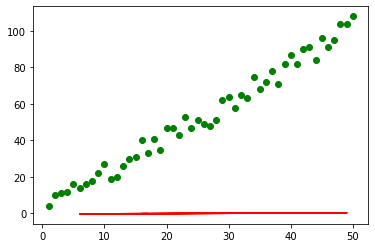

In [315]:
plt.plot(x_test.numpy(), y_pred.detach().numpy(), 'r')
plt.scatter(X.numpy(), y.numpy(), c = 'g')

<div class="alert alert-info">
    Above graph looks that model is not able to pick what is actuall bahaviour of the data.
       <br><br>
        Now, will add the loss function and optimizer into the model, to improve the model efficiency
</div>

In [383]:
class Model(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()
        self.linear = nn.Linear(in_features, out_features)
        
    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred

In [394]:
X = torch.linspace(1,50,50).reshape(-1,1)
torch.manual_seed(71) # to obtain reproducible results
e = torch.randint(-1,1,(50,1),dtype=torch.float)
y = 208*X + 100.0 

model = Model(1,1)
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.0001)
epochs = 500
losses = []

for i in range(epochs):
    i+=1
    y_pred = model.forward(X)
    loss = criterion(y_pred, y)
    losses.append(loss)
    print(f'epoch: {i:<3}  loss: {loss.item():<10.8f}  weight: {model.linear.weight.item():10.8f}  \
bias: {model.linear.bias.item():10.8f}') 
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch: 1    loss: 38419664.00000000  weight: -0.56887245  bias: -0.03454399
epoch: 2    loss: 26350020.00000000  weight: 35.75258636  bias: 1.04916406
epoch: 3    loss: 18072300.00000000  weight: 65.83212280  bias: 1.94741583
epoch: 4    loss: 12395193.00000000  weight: 90.74241638  bias: 2.69208241
epoch: 5    loss: 8501664.00000000  weight: 111.37181091  bias: 3.30955768
epoch: 6    loss: 5831364.00000000  weight: 128.45599365  bias: 3.82169962
epoch: 7    loss: 3999994.25000000  weight: 142.60420227  bias: 4.24660969
epoch: 8    loss: 2743985.50000000  weight: 154.32099915  bias: 4.59927893
epoch: 9    loss: 1882575.87500000  weight: 164.02423096  bias: 4.89212179
epoch: 10   loss: 1291796.12500000  weight: 172.05992126  bias: 5.13541985
epoch: 11   loss: 886620.93750000  weight: 178.71464539  bias: 5.33768702
epoch: 12   loss: 608740.31250000  weight: 184.22572327  bias: 5.50597477
epoch: 13   loss: 418161.06250000  weight: 188.78968811  bias: 5.64612246
epoch: 14   loss: 287456.15